In [1]:
# seaborn is mainly used for plotting
# it is built off of Matplotlib
# works well with pandas data frames

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
# using tips dataset from seaborn package

tips = sns.load_dataset('tips')

In [5]:
tips.head() # tips refers to dining tips at a restaurant

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


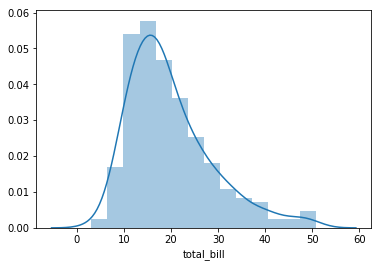

In [9]:
# dist plot stands for a univariate distribution plot (use for one variable at a time)

sns.distplot(tips['total_bill']) # don't worry about warning

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


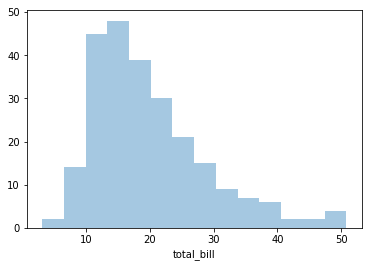

In [10]:
# getting rid of kde to make it a simple histogram

sns.distplot(tips['total_bill'], kde = False) 

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


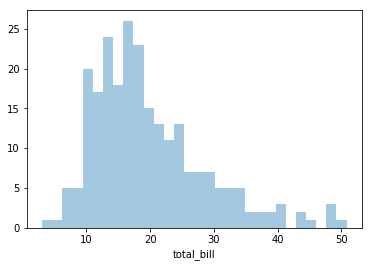

In [11]:
# changing bin size

sns.distplot(tips['total_bill'], kde = False, bins = 30) 

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


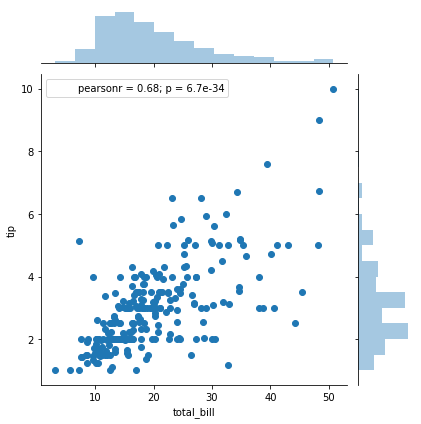

In [12]:
# joint plots allow us to compare distributions

sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


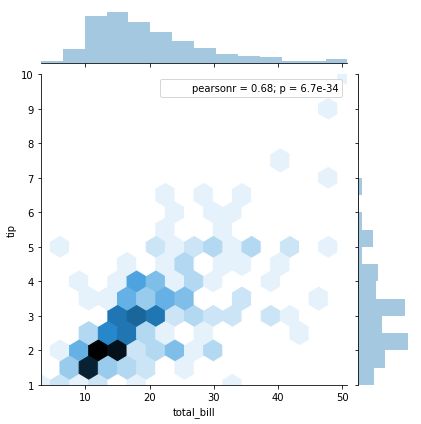

In [13]:
# represented as a hexagon

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')

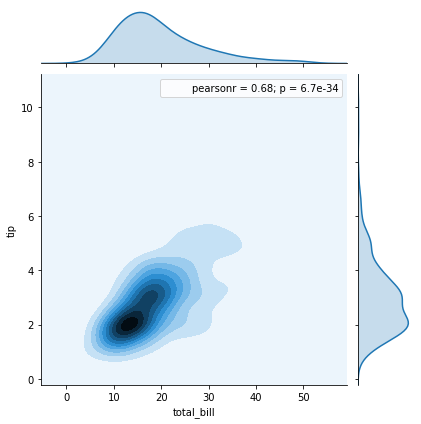

In [14]:
# also possible for 2d kde figure

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'kde')

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


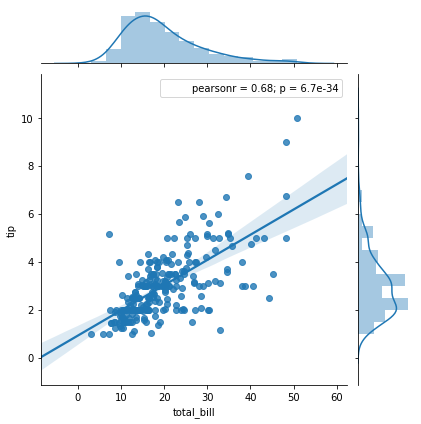

In [15]:
# plot with regression line drawn through it ('reg' for regression)

sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

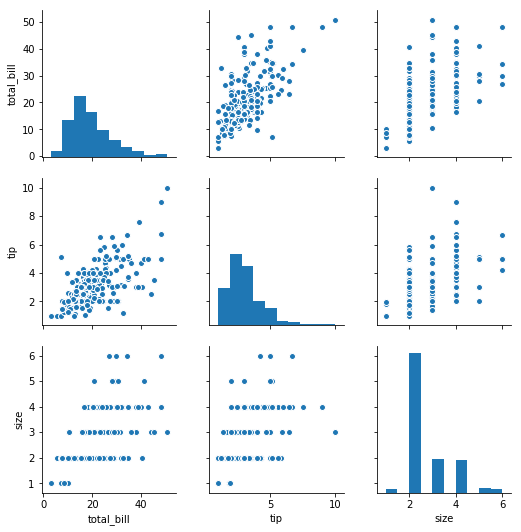

In [16]:
# pair plots allow you to see pairwise relationships across dataset - good for quick visualizations

sns.pairplot(tips)

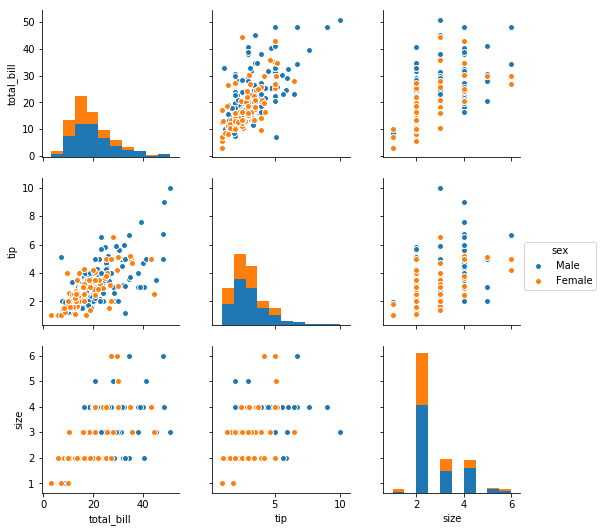

In [17]:
# can also add hue argument to pair plots

sns.pairplot(tips, hue = 'sex') # colors now based on whether observation was male or female

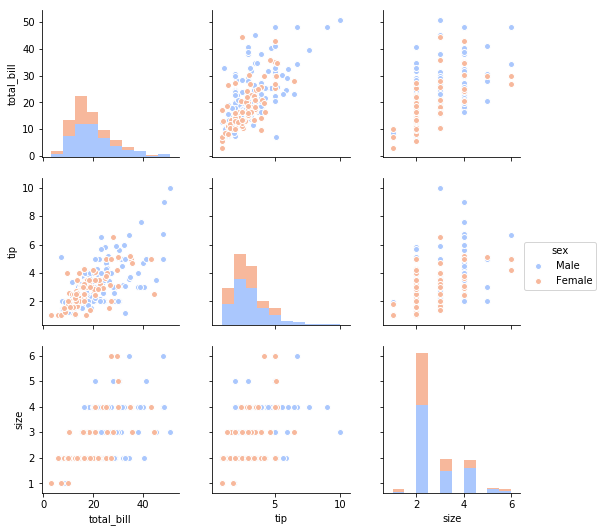

In [18]:
# palettes are also available to make it look nicer

sns.pairplot(tips, hue = 'sex', palette = 'coolwarm') 

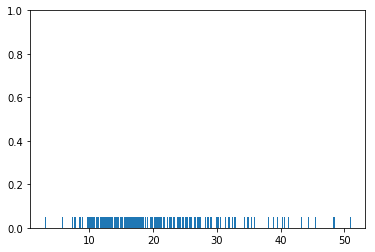

In [19]:
# rug plots are another way to show univariate distributions

sns.rugplot(tips['total_bill']) # only shows where a value appears in a column within a dataset

(0, 1)

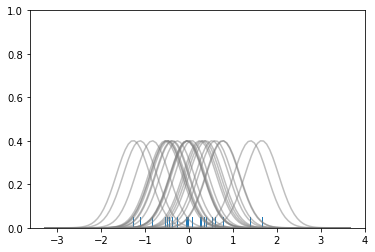

In [20]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

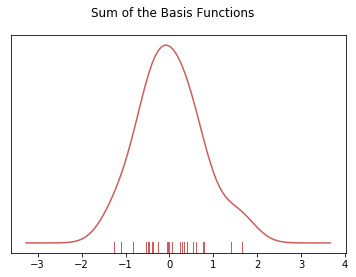

In [21]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

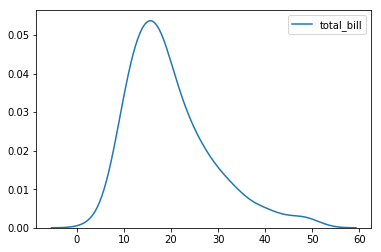

In [22]:
# the above two steps make a kde plot
# below shows kde plot for tips in one step

sns.kdeplot(tips['total_bill'])

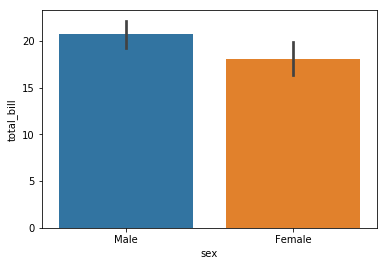

In [23]:
# moving onto categorical plots
# start with bar plot

sns.barplot(x='sex', y='total_bill', data = tips) # mean value for each sex is default

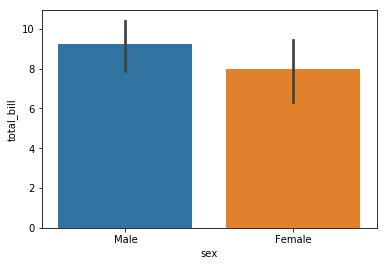

In [24]:
sns.barplot(x='sex', y='total_bill', data = tips, estimator = np.std) # standard deviation for each sex (variance)

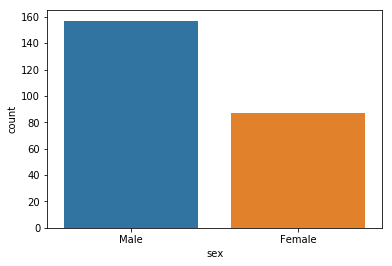

In [25]:
# count plot is similar to bar plot but it only shows counts of occurrences - only specify x value

sns.countplot(x = 'sex', data = tips)

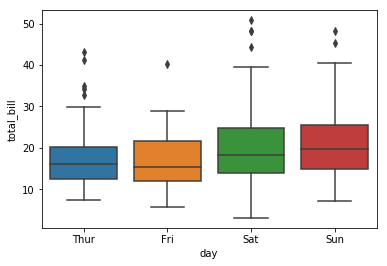

In [26]:
# boxplots - showing total bill for each day of the week recorded

sns.boxplot(x = 'day', y = 'total_bill', data = tips)

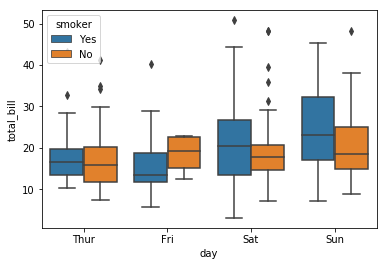

In [27]:
# lets add a hue to the boxplots to split by smoker status

sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')

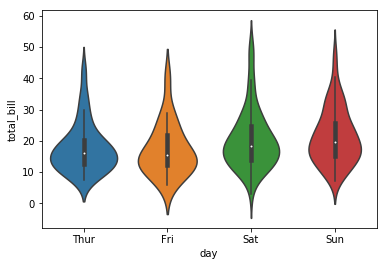

In [28]:
# violin plots are similar to box plots

sns.violinplot(x = 'day', y = 'total_bill', data = tips)

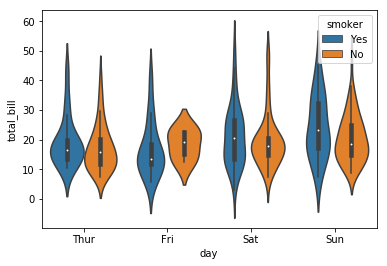

In [30]:
# hue works for violin plots too

sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker')

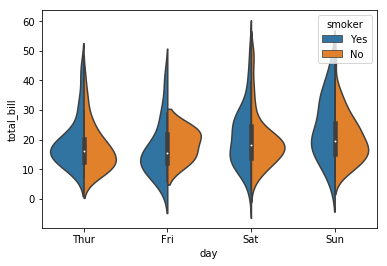

In [31]:
# another way of showing with Split set to true - allows for better comparison of distributions

sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', split = True)

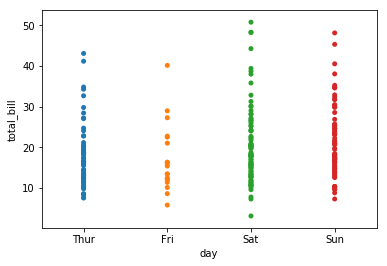

In [32]:
# strip plots are scatter plots where one variable is categorical

sns.stripplot(x = 'day', y = 'total_bill', data = tips)

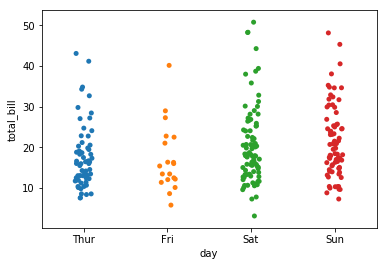

In [33]:
# setting jitter to true allows us to see more points

sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True)

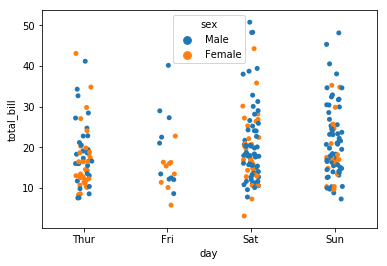

In [34]:
# can also add hue arguments

sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex')

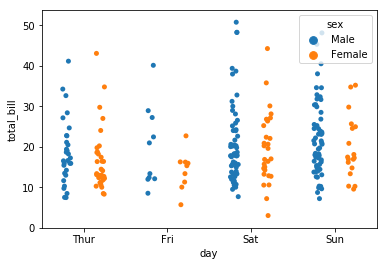

In [36]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter = True, hue = 'sex', dodge = True) # dodge (split) by sex

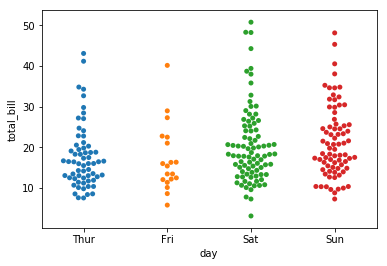

In [37]:
# swarm plots are similar to strip plots but the points don't overlap - combo of strip and violin plots

sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

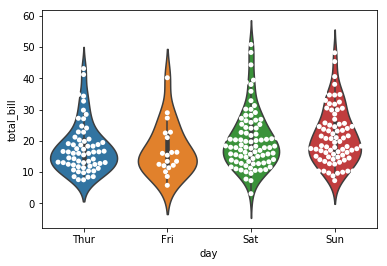

In [39]:
# can overlay a violin plot on a swarm plot to show calculations
# don't do this for executives - you will confuse them (data scientists and nerds only)

sns.violinplot(x = 'day', y = 'total_bill', data = tips)
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'white')

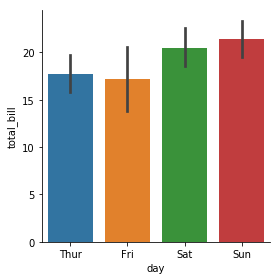

In [40]:
# factor plots are described by the 'kind' arguments and can make any type of categorical graph

sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')

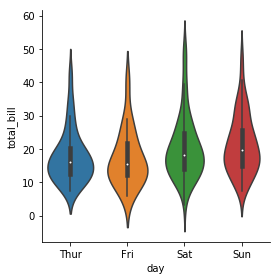

In [41]:
sns.factorplot(x = 'day', y = 'total_bill', data = tips, kind = 'violin')

In [42]:
# moving onto matrix plots

flights = sns.load_dataset('flights')
flights.head() # of people flying in a given month and year

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [44]:
tc = tips.corr()
tc # data is now in a format that can be processed in a matrix plot (heatmap)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


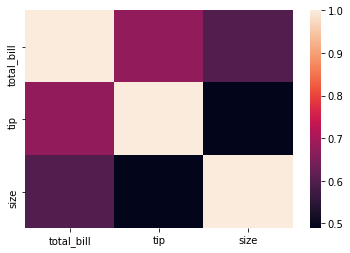

In [45]:
sns.heatmap(tc)

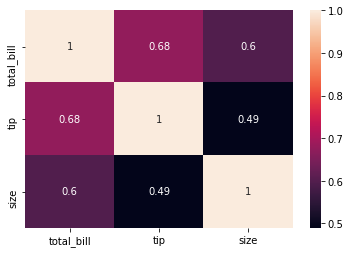

In [46]:
sns.heatmap(tc, annot = True) # adds values to plot

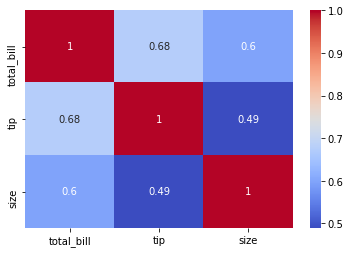

In [47]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [49]:
fp = flights.pivot_table(index = 'month', columns = 'year', values = 'passengers')
fp

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


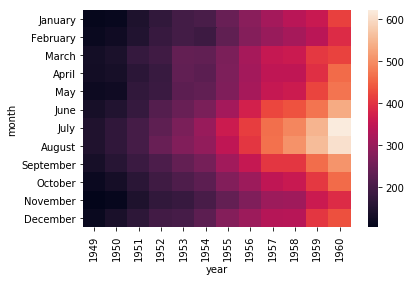

In [50]:
sns.heatmap(fp)

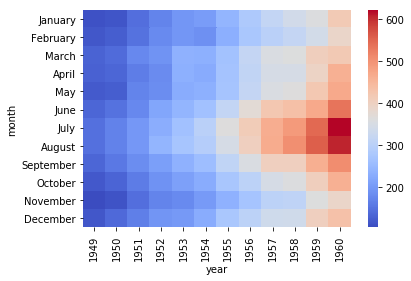

In [52]:
# cmap changes the palette color

sns.heatmap(fp, cmap = 'coolwarm')

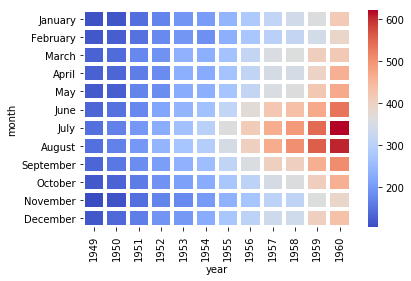

In [54]:
# can also space out values in the heatmap using line width and line style

sns.heatmap(fp, cmap = 'coolwarm', linecolor = 'white', linewidth = 3)

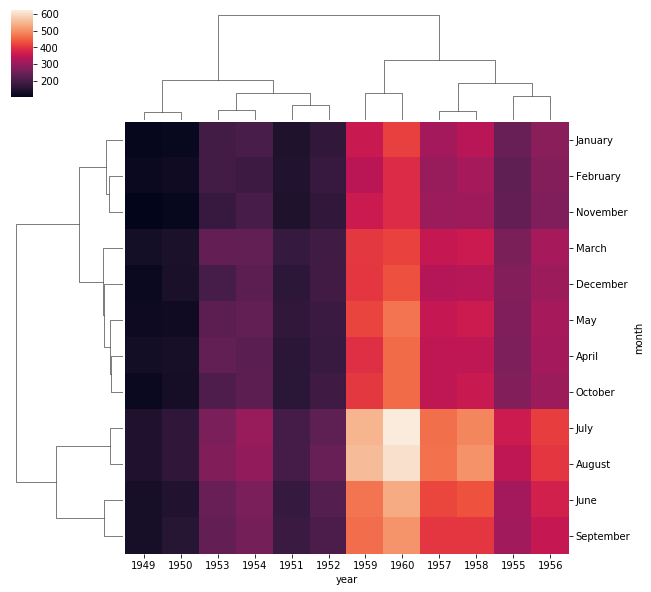

In [55]:
# cluster maps use hierarchical clustering to cluster columns and rows together

sns.clustermap(fp) # x and y values are out of order because they are clustered together based on similarity

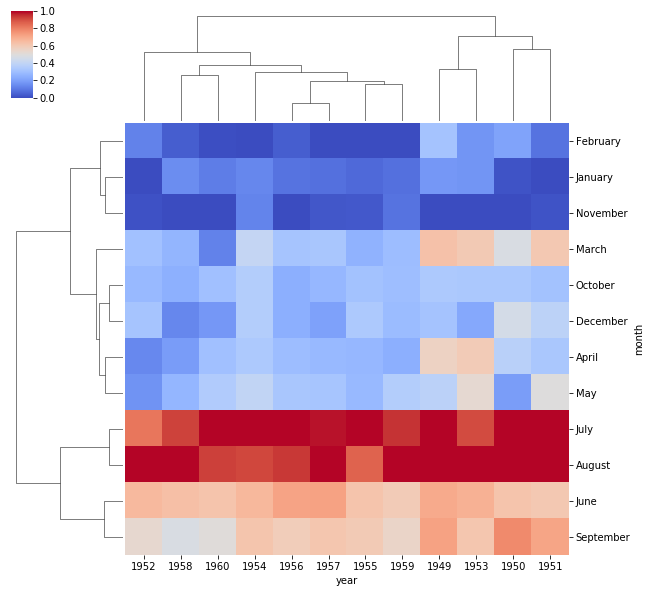

In [58]:
# may want to standardize the scale when use a cluster map

sns.clustermap(fp, cmap = 'coolwarm', standard_scale = 1)

In [59]:
# moving onto grids

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

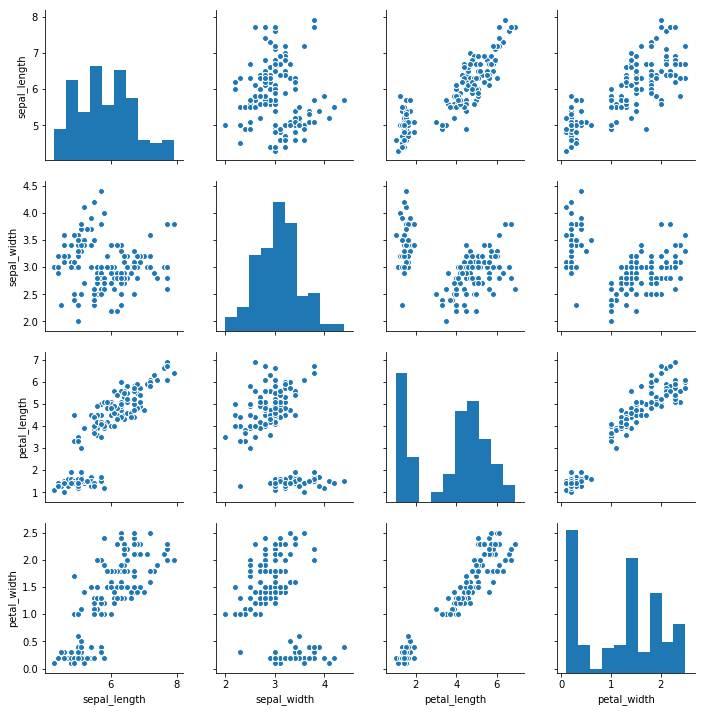

In [61]:
sns.pairplot(iris)

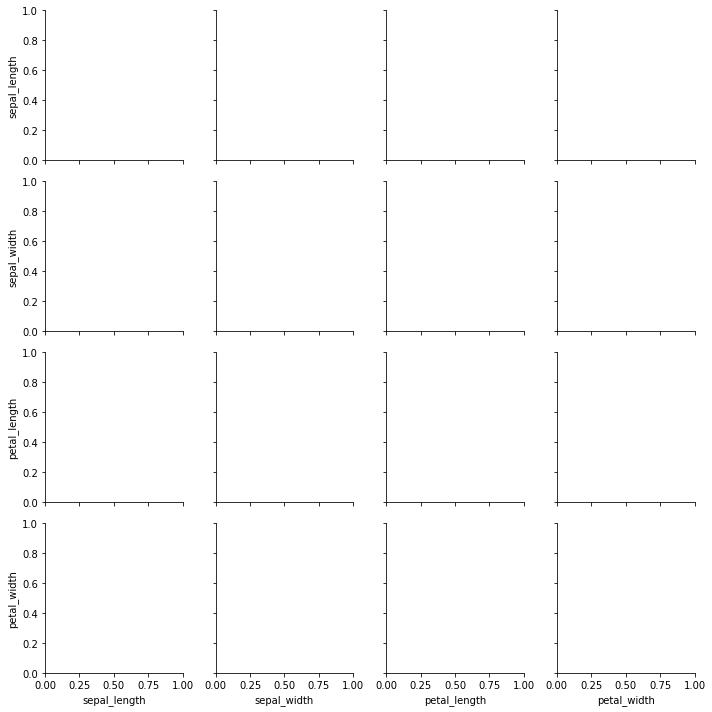

In [62]:
# pair grids are similar but allow for greater control of visuals

sns.PairGrid(iris) # creates blank grids

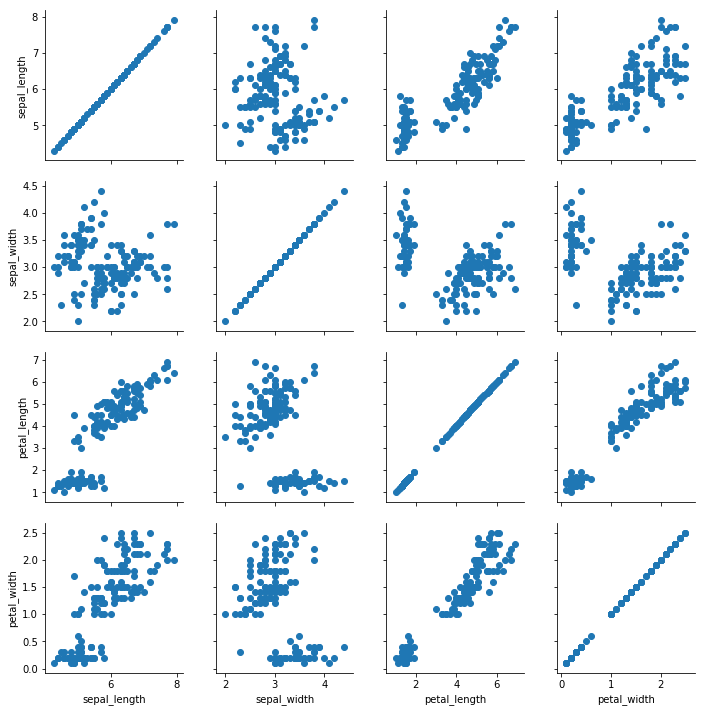

In [64]:
# set variable equal to grid, then map visuals onto grids (in this case, scatter plots)

g = sns.PairGrid(iris)
g.map(plt.scatter)

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\contour.py:960

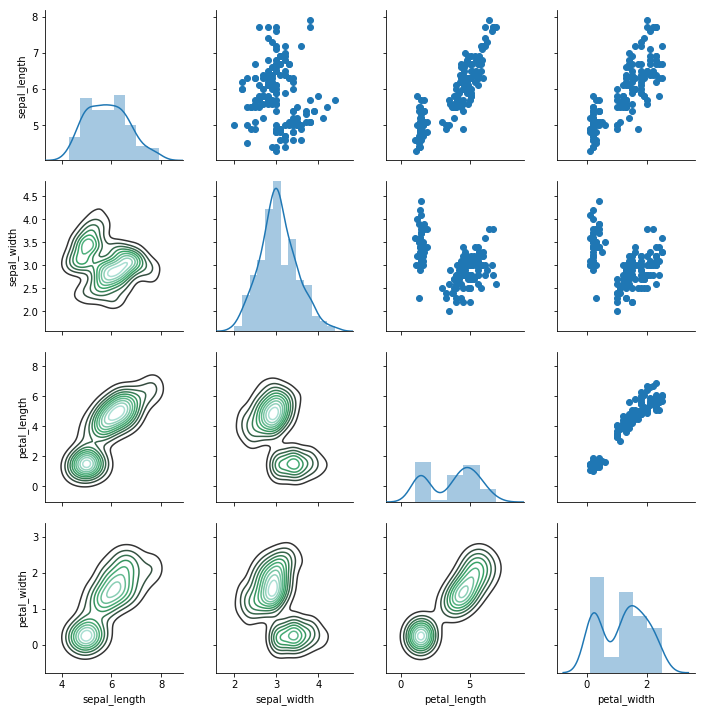

In [65]:
# different map arguments allow for greater customization

g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

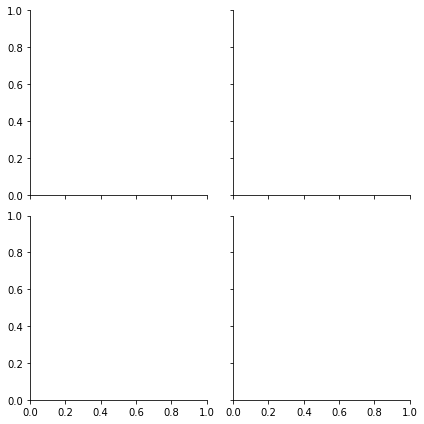

In [67]:
# facet grids with tips data

g = sns.FacetGrid(tips, col = 'time', row = 'smoker')
g

C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\casey\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


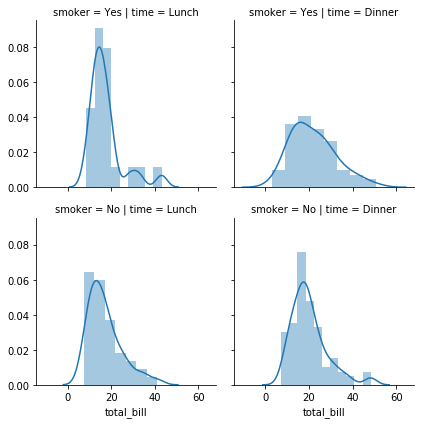

In [68]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker')
g.map(sns.distplot, 'total_bill')

# axes are based on facet grid arguments, data is mapped on with map function to show total bills

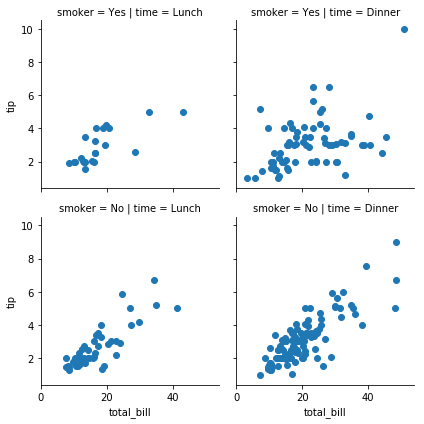

In [70]:
g = sns.FacetGrid(tips, col = 'time', row = 'smoker')
g.map(plt.scatter, 'total_bill', 'tip') # need two columns to do a scatter plot 

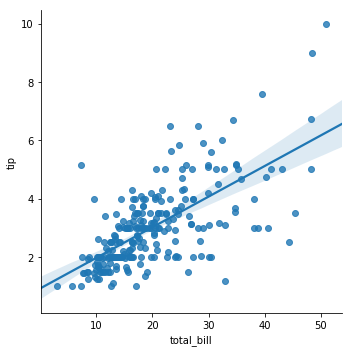

In [71]:
# moving onto regression plots with lmplot

sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

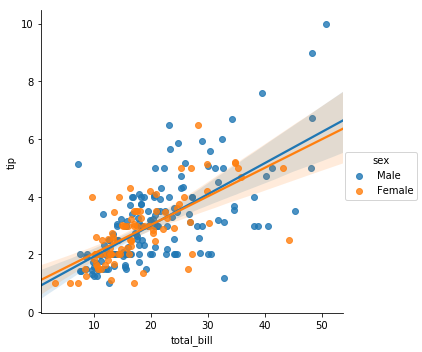

In [72]:
# hues can be added for categorical variables

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

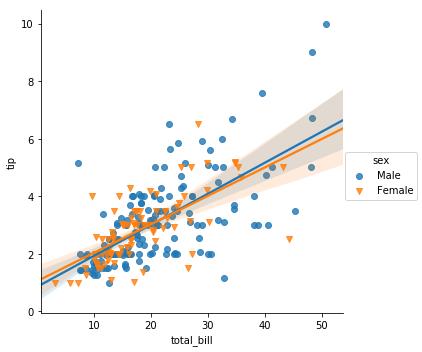

In [74]:
# similar to Matplotlib, markers can be added to change point shape

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'])

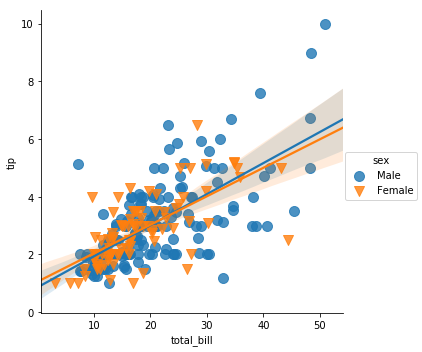

In [75]:
# scatter_kws allows you to pass in a dictionary with Matplotlib arguments

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'],
          scatter_kws = {'s':100}) # s for size of scatter plot - check documentation for more

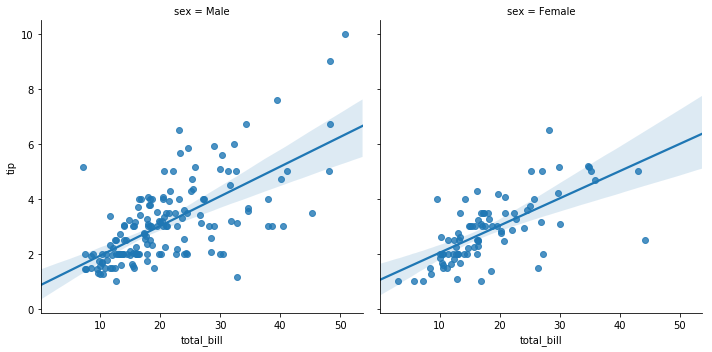

In [76]:
# you can use a grid instead of separating by hue using the col argument

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex')

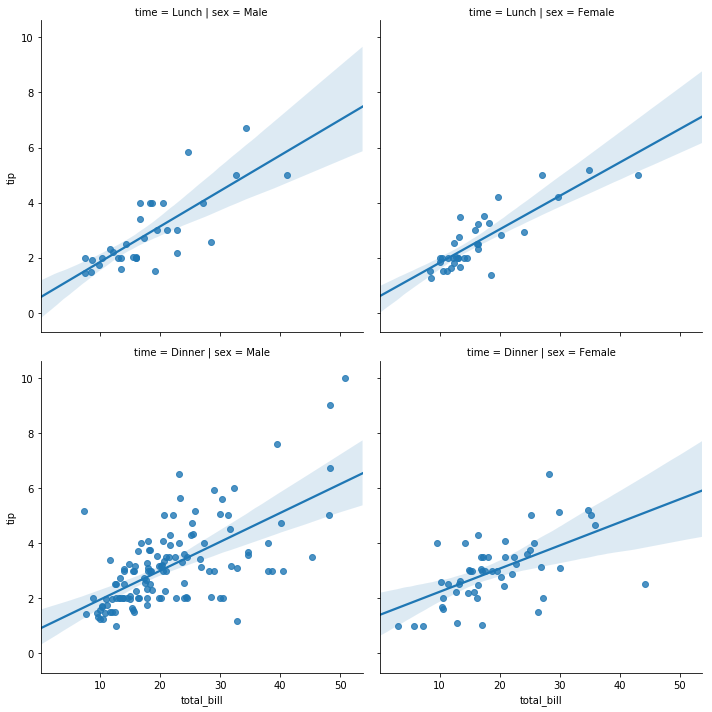

In [77]:
# also works for rows

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex', row = 'time')

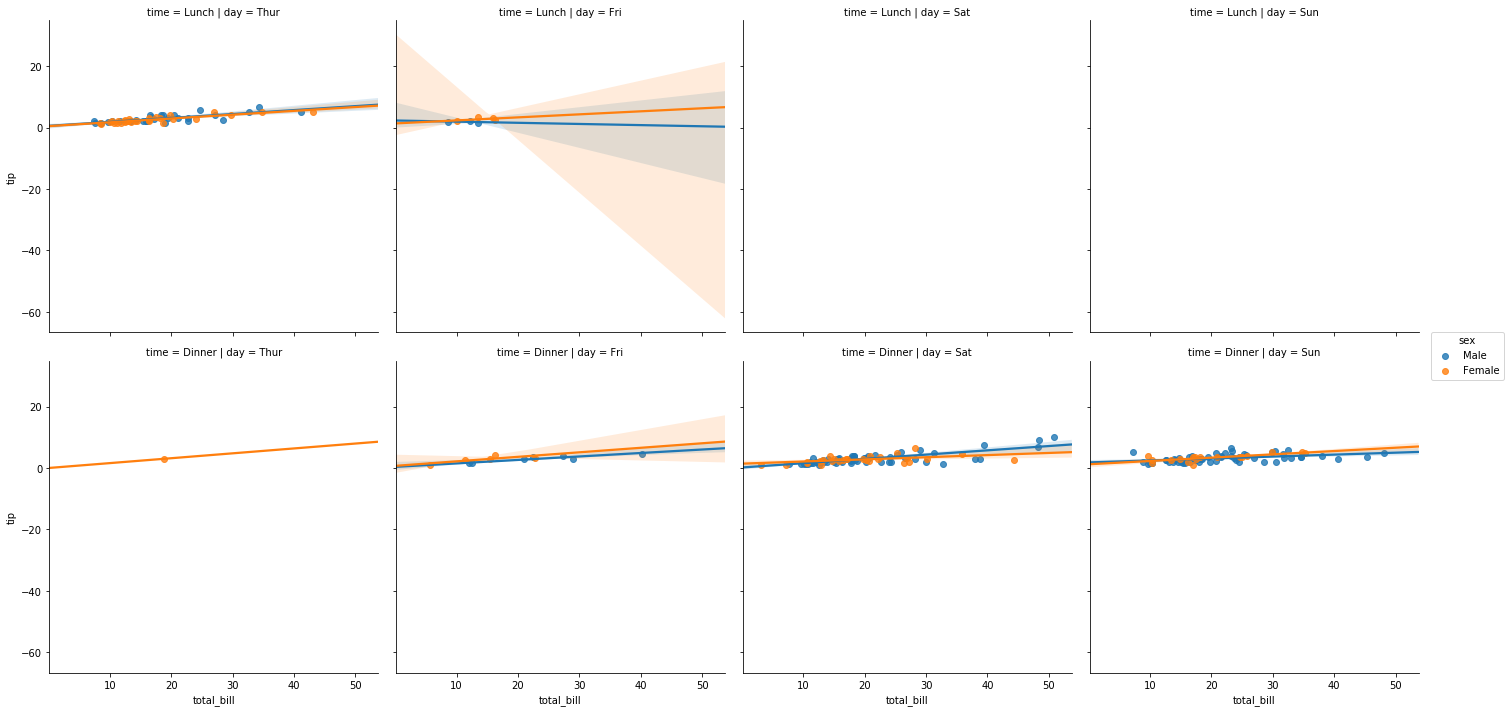

In [78]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', row = 'time', hue = 'sex')

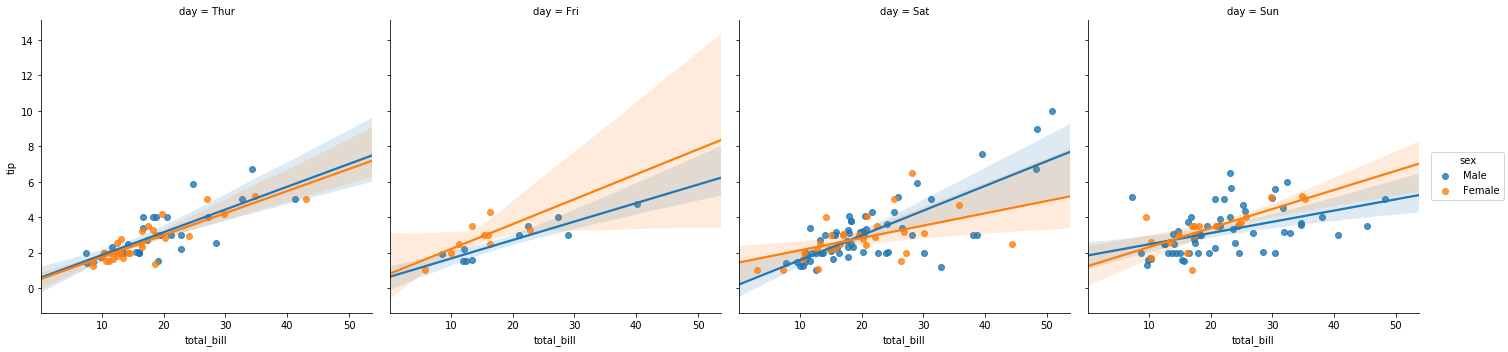

In [79]:
# too much data - eliminate row

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex')

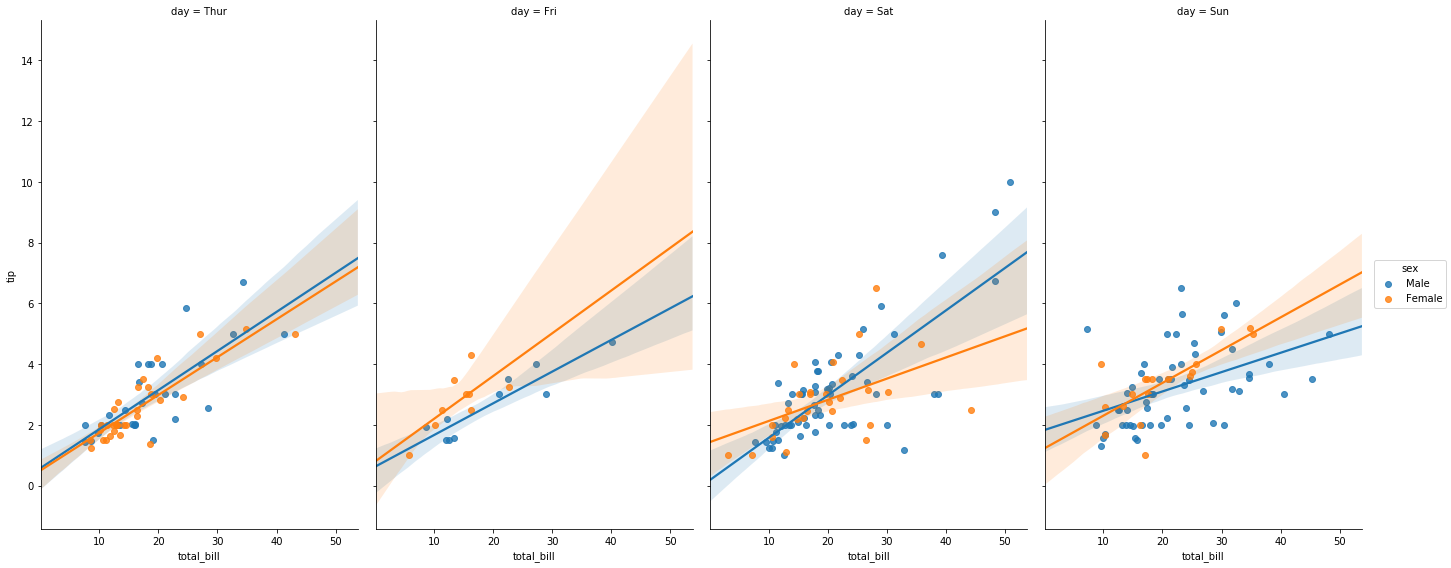

In [80]:
# looks better but size and aspect are wrong

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', aspect = 0.6, size = 8)

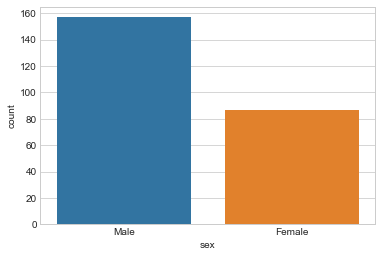

In [83]:
# style and color with set_style

sns.set_style('whitegrid') # different options available
sns.countplot(x = 'sex', data = tips)

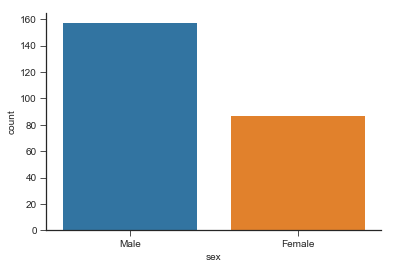

In [86]:
sns.set_style('ticks') # tick marks

sns.countplot(x = 'sex', data = tips)

sns.despine() # removes right side borders

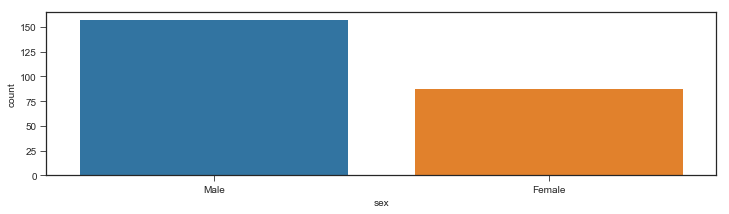

In [88]:
# you can set figure size with matplotlib to adjust seaborn plots

plt.figure(figsize = (12, 3))
sns.countplot(x = 'sex', data = tips)

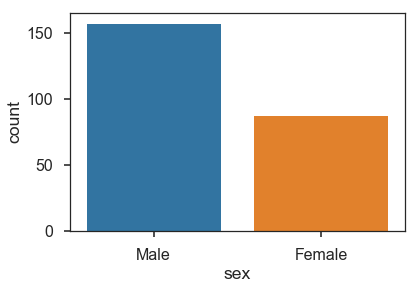

In [89]:
# scale and context - setting context to poster format

sns.set_context('poster') # seaborn is expecting this to go on a poster and sets size automatically
sns.countplot(x = 'sex', data = tips)

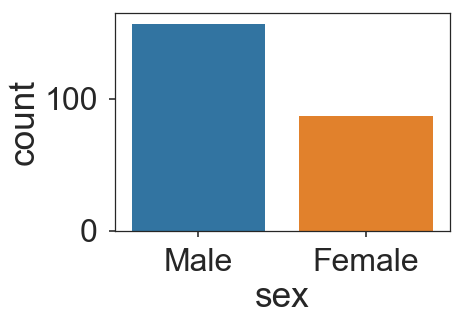

In [91]:
sns.set_context('poster', font_scale = 2) # font is now double the size
sns.countplot(x = 'sex', data = tips)

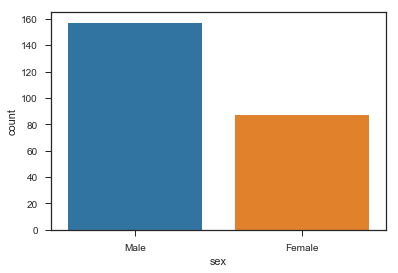

In [92]:
# usually setting the context as notebook IRL

sns.set_context('notebook')
sns.countplot(x = 'sex', data = tips)

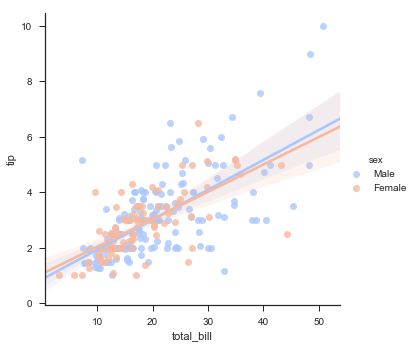

In [93]:
# palettes and colors
# google 'matplotlib color map' to see more options

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'coolwarm')

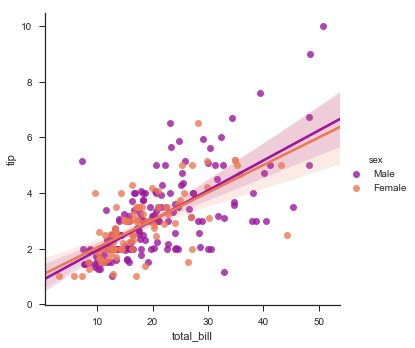

In [94]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'plasma')

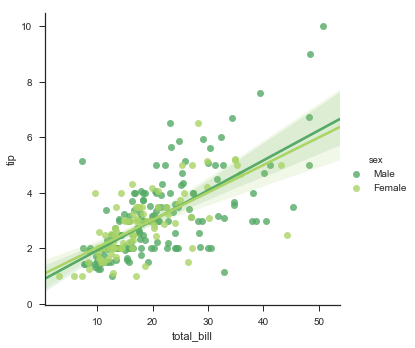

In [98]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'summer')

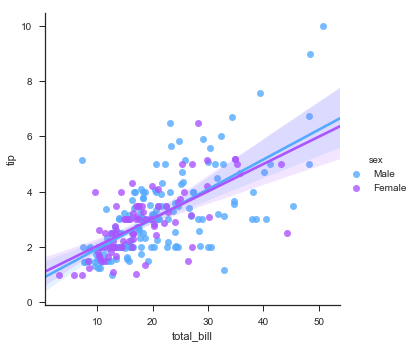

In [96]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'cool')